### Prediction of price for second hand cars using `Regression`

#### Imports

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError, Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError, Accuracy
import numpy as np

#### Read Data

In [2]:
data = pd.read_csv("SecondHandCarDataSet.csv")
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


#### Data Processing

In [3]:
tensor_data = tf.constant(data)
tensor_data = tf.random.shuffle(tensor_data)

2024-03-21 00:11:37.416190: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2024-03-21 00:11:37.416205: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2024-03-21 00:11:37.416209: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2024-03-21 00:11:37.416221: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-21 00:11:37.416232: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
X = tensor_data[:, 3:-1]
Y = tensor_data[:,-1]
Y = tf.expand_dims(Y,axis=-1)

In [5]:
TRAIN_RATIO = 0.8
TEST_RATIO = 0.1
VALIDATION_RATIO = 0.1
DATASET_SIZE = len(data)

In [67]:
#Training Data
x_train=X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train=Y[:int(DATASET_SIZE*TRAIN_RATIO)]

#Testing Data
x_test = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO))]
y_test = Y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO))]

#Validation Data
x_validate = X[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]
y_validate = Y[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]

In [84]:
normalizer = Normalization()
normalizer.adapt(x_train)

#### Creating a model

In [85]:
model = tf.keras.Sequential(
    [
        InputLayer(shape=(8,)),
        normalizer,
        Dense (128, activation='relu') ,
        Dense (128, activation = 'relu') ,
        Dense (128, activation = 'relu') ,
        Dense (1) ,
    ]
)
model. summary ()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_6 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,322 (134.07 KB)

 Trainable params: 34,305 (134.00 KB)

 Non-trainable params: 17 (72.00 B)

In [86]:
model.compile(
    optimizer= Adam(learning_rate=0.1),
    loss = MeanAbsoluteError(),
    metrics= [RootMeanSquaredError()]
)

In [87]:
history = model.fit(x_train,y_train,validation_data=(x_validate,y_validate),epochs=100,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 225892.0938 - root_mean_squared_error: 263953.0000 - val_loss: 51284.6797 - val_root_mean_squared_error: 67270.5078
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 47236.6875 - root_mean_squared_error: 59191.0898 - val_loss: 50775.8438 - val_root_mean_squared_error: 63566.5820
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 44291.9414 - root_mean_squared_error: 54696.3711 - val_loss: 66995.7344 - val_root_mean_squared_error: 79804.6797
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 376881.1250 - root_mean_squared_error: 1151475.0000 - val_loss: 258876.9531 - val_root_mean_squared_error: 282344.1562
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 186128.0000 - root_mean_squared_error: 219094.5625 - val_loss: 42139.4453 - val_root_mean_squared_error: 57726.9922
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 200068.6875 - root_mean_squared_error: 472079.6562 - val_loss

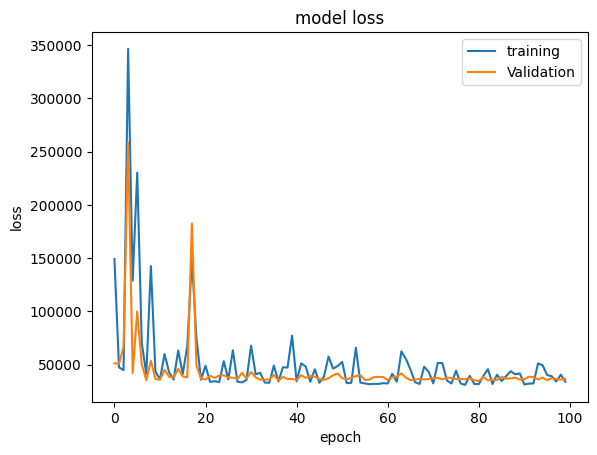

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training','Validation'])
plt.show()

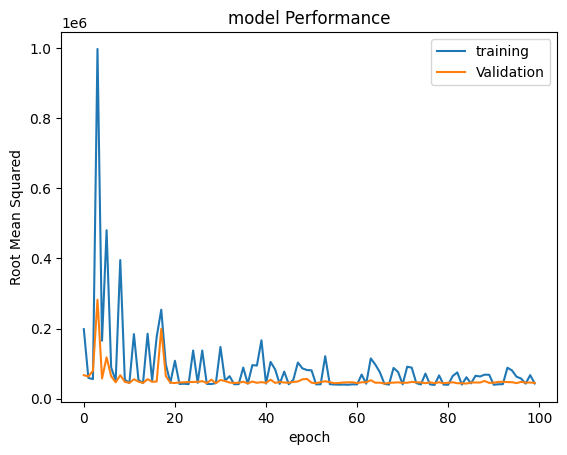

In [89]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model Performance')
plt.ylabel('Root Mean Squared')
plt.xlabel('epoch')
plt.legend(['training','Validation'])
plt.show()

In [90]:
 model.evaluate(x_test,y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 42041.2305 - root_mean_squared_error: 53075.5703 


[35849.01953125, 50880.37890625]

In [91]:
model.predict(tf.expand_dims(x_test[0], axis = 0 ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


array([[450168.]], dtype=float32)

In [92]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([381846.5])>

In [93]:
y_true = list(y_test[:,0] .numpy())

In [94]:
y_pred = list(model. predict(x_test) [:,0])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


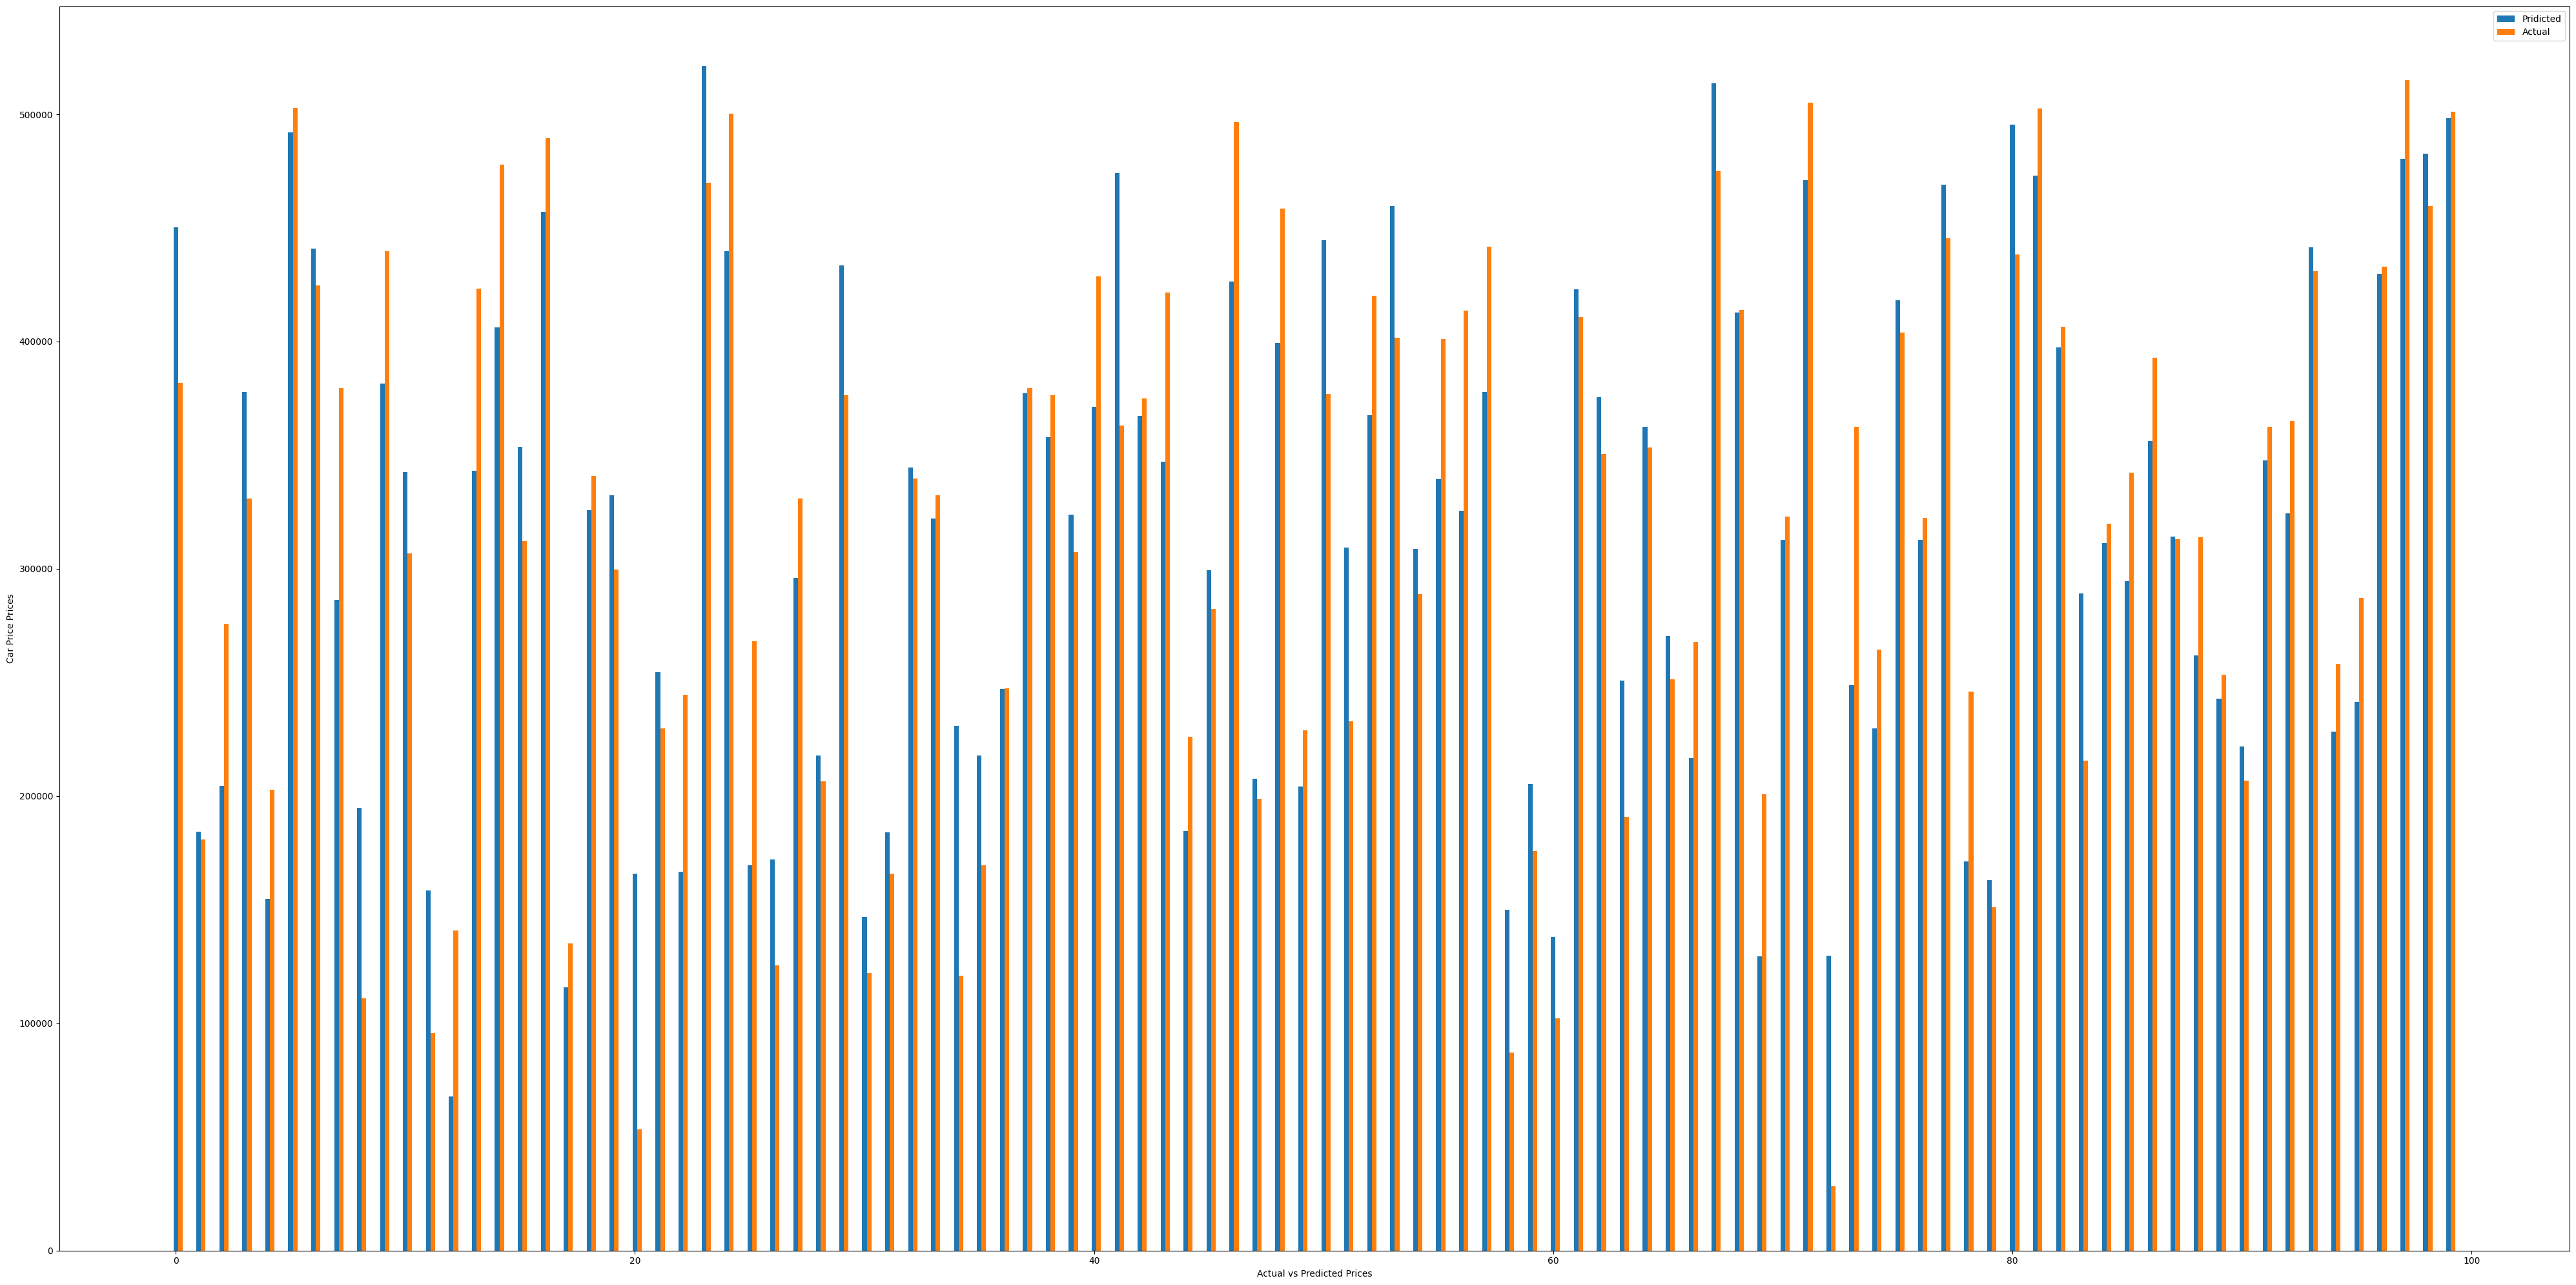

In [95]:
ind = np.arange (100)
plt. figure(figsize=(40,20))
width = 0.2
plt.bar(ind, y_pred, width, label='Predicted Car Price')
plt.bar(ind + width, y_true, width, label='Actual Car Price')
plt.xlabel('Actual vs Predicted Prices')
plt.ylabel( 'Car Price Prices')
plt.legend(['Pridicted','Actual'])
plt.tight_layout()
plt.show()